자전거 수요 예측 모델

<데이터 구조>

datetime 2011-11-12 16:00

season 1 ~ 4 봄, 여름, 가을, 겨울

holiday 0,1 휴일인지 아닌지

workingday 0, 1 일하는 날인지 아닌지

weather 1 ~ 4 숫자 커질수록 날씨 안좋음

temp 온도

atemp 체감온도

humidity 습도 0% ~ 100%

windspeed 풍속

casual 비등록고객이 대여한 자전거 수

registered 등록고객이 대여한 자전거 수

count (Target) = casual + registered

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [29]:
'''
제출용 파일 양식

datetime,count
2011-01-20 00:00:00,0
2011-01-20 01:00:00,0
2011-01-20 02:00:00,0
2011-01-20 03:00:00,0
2011-01-20 04:00:00,0
2011-01-20 05:00:00,0
2011-01-20 06:00:00,0
2011-01-20 07:00:00,0
2011-01-20 08:00:00,0
2011-01-20 09:00:00,0
2011-01-20 10:00:00,0
2011-01-20 11:00:00,0
2011-01-20 12:00:00,0
2011-01-20 13:00:00,0
2011-01-20 14:00:00,0
2011-01-20 15:00:00,0
2011-01-20 16:00:00,0

'''

'\n제출용 파일 양식\n\ndatetime,count\n2011-01-20 00:00:00,0\n2011-01-20 01:00:00,0\n2011-01-20 02:00:00,0\n2011-01-20 03:00:00,0\n2011-01-20 04:00:00,0\n2011-01-20 05:00:00,0\n2011-01-20 06:00:00,0\n2011-01-20 07:00:00,0\n2011-01-20 08:00:00,0\n2011-01-20 09:00:00,0\n2011-01-20 10:00:00,0\n2011-01-20 11:00:00,0\n2011-01-20 12:00:00,0\n2011-01-20 13:00:00,0\n2011-01-20 14:00:00,0\n2011-01-20 15:00:00,0\n2011-01-20 16:00:00,0\n\n'

우선 datetime object > datetime type으로 형변환

In [30]:
df['datetime']=pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

<Axes: xlabel='year', ylabel='count'>

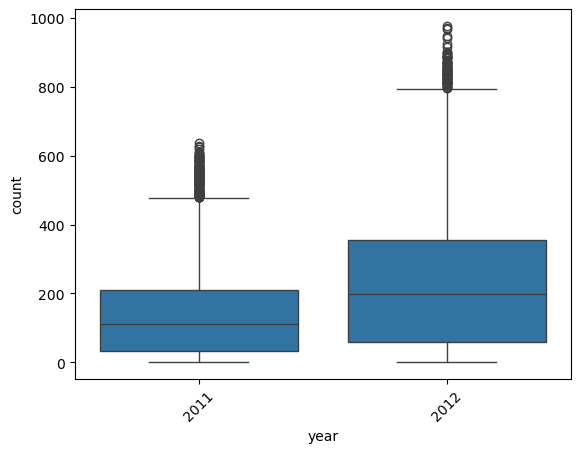

In [31]:
# year 대비 count
plt.xticks(rotation=45)
sns.boxplot(x='year', y='count', data = df)

<Axes: xlabel='month', ylabel='count'>

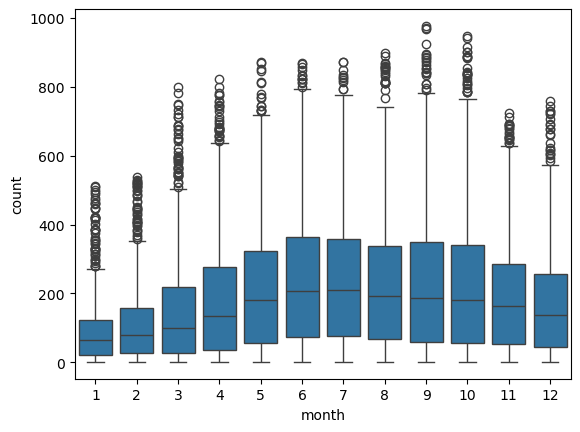

In [32]:
# month 대비 count
sns.boxplot(x='month', y='count', data = df)

<Axes: xlabel='day', ylabel='count'>

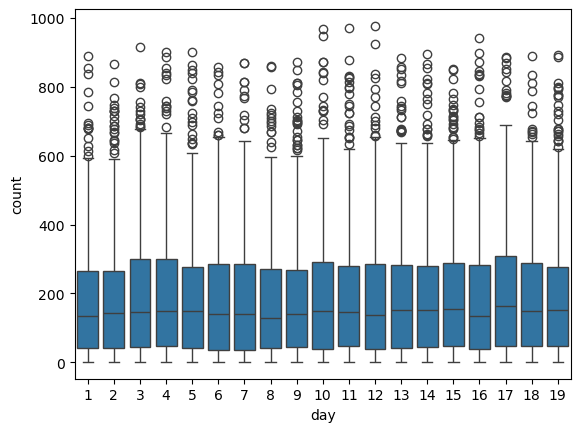

In [33]:
sns.boxplot(x='day', y='count', data = df)

<Axes: xlabel='hour', ylabel='count'>

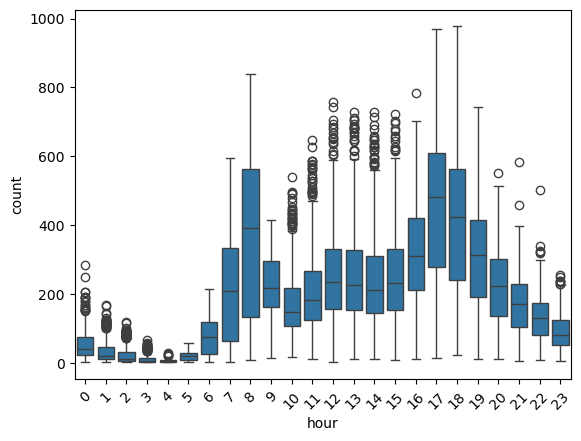

In [34]:
plt.xticks(rotation=45)
sns.boxplot(x='hour', y='count', data = df)

year 2011보다 2012때 count가 조금더 큰 양상

month 12 1 2 3 이 상대적으로 적고 나머지는 비슷한 양상

day 거의 차이 없음

hour 값에 따라 많은 차이

<Axes: xlabel='season', ylabel='count'>

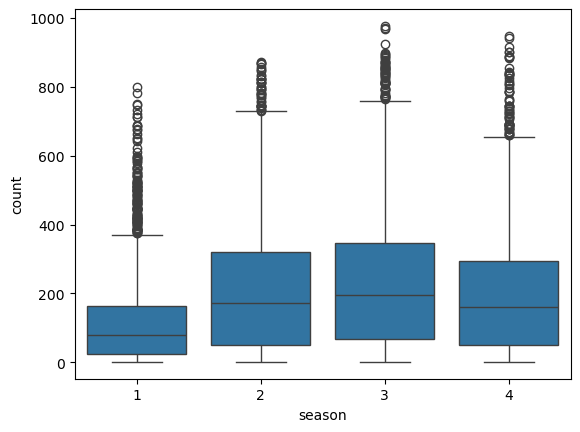

In [35]:
# season count 비교
sns.boxplot(x='season', y='count', data=df)

1이 상대적으로 낮다

<Axes: xlabel='holiday', ylabel='count'>

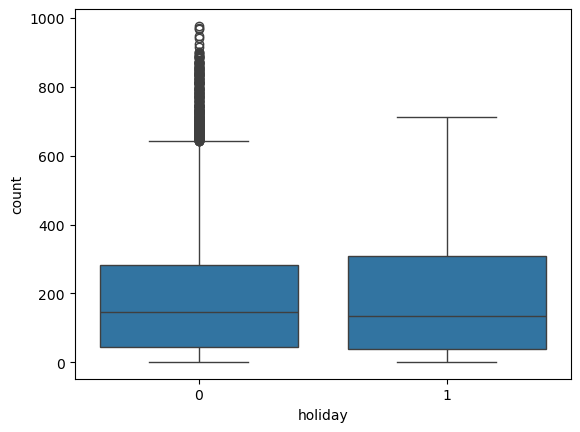

In [36]:
# holiday 분석
sns.boxplot(x='holiday', y='count', data=df)

<Axes: xlabel='workingday', ylabel='count'>

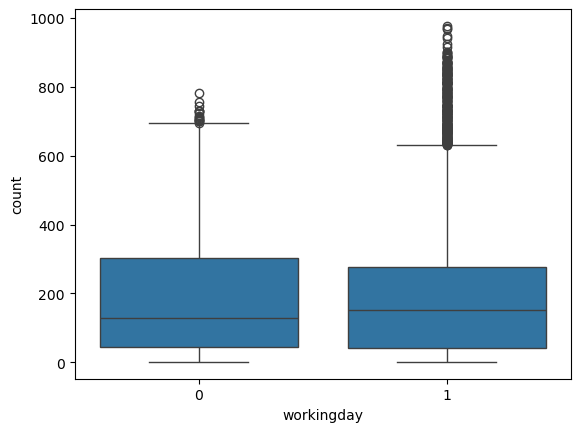

In [37]:
# workingday 분석
sns.boxplot(x='workingday', y='count', data=df)

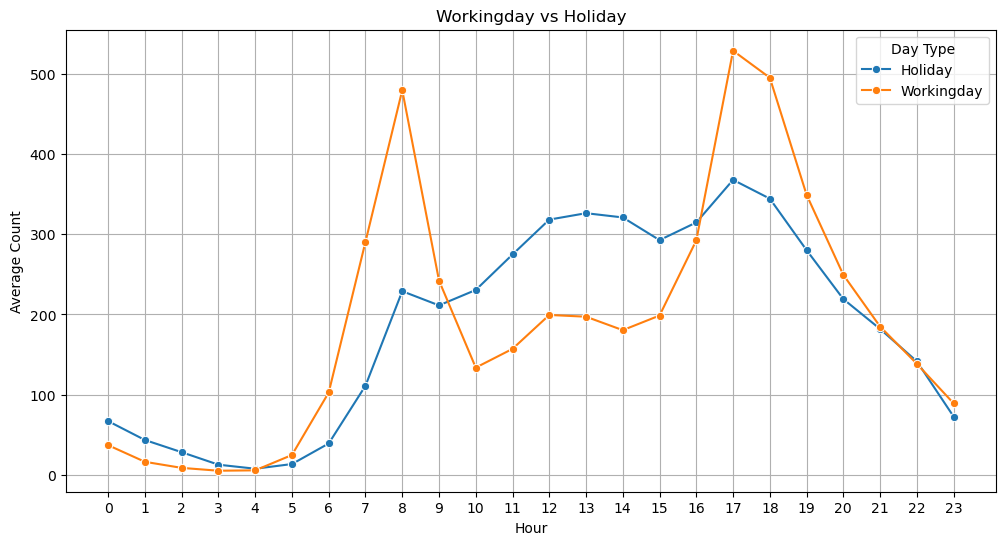

In [38]:
# holiday workingday 한꺼번에 비교
# holiday 기준: hour별 평균 count
holiday_group = df[df['holiday'] == 1].groupby('hour')['count'].mean().reset_index()
holiday_group['type'] = 'Holiday'

# workingday 기준: hour별 평균 count
workingday_group = df[df['workingday'] == 1].groupby('hour')['count'].mean().reset_index()
workingday_group['type'] = 'Workingday'

# 두 데이터프레임 합치기
compare_df = pd.concat([holiday_group, workingday_group])

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=compare_df, x='hour', y='count', hue='type', marker='o')
plt.title('Workingday vs Holiday')
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend(title='Day Type')
plt.show()

holiday workingday 각각 보면 별의미가 없어보여서 같이 시각화

차이가 분명히 있으며 특히 6 ~ 18 까지는 꽤 차이가 있다

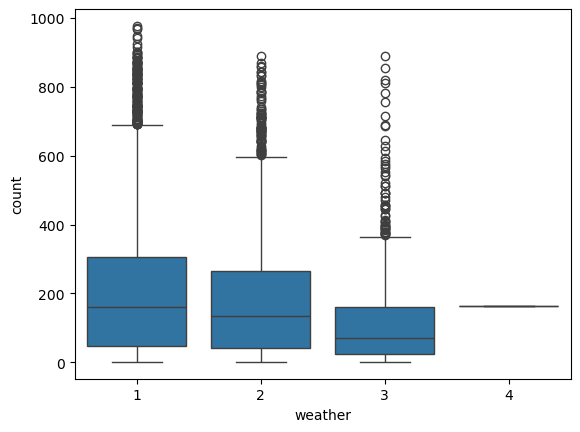

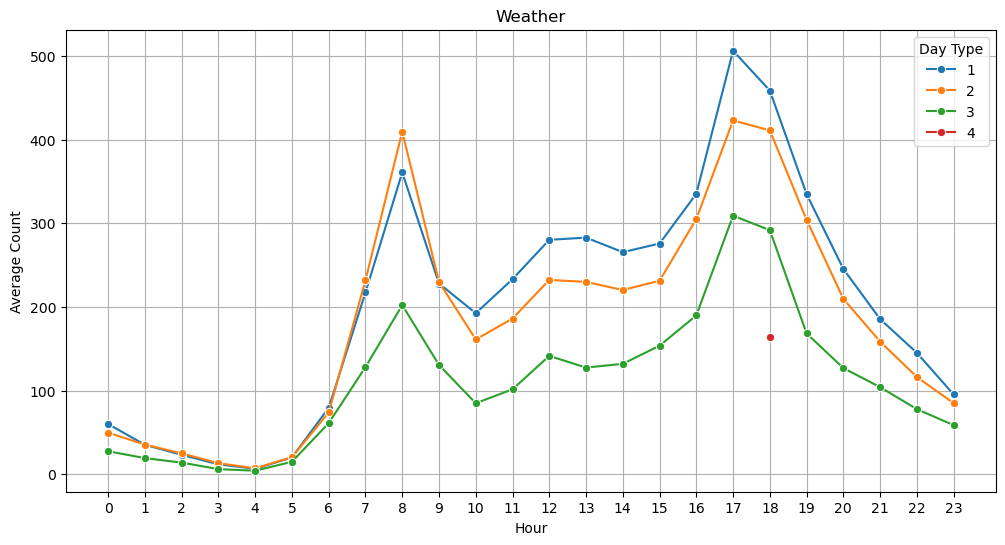

In [39]:
# weather 분석
sns.boxplot(x='weather', y='count', data=df)

# weather 기준: hour별 평균 count
weather_group1 = df[df['weather'] == 1].groupby('hour')['count'].mean().reset_index()
weather_group1['type'] = '1'

weather_group2 = df[df['weather'] == 2].groupby('hour')['count'].mean().reset_index()
weather_group2['type'] = '2'

weather_group3 = df[df['weather'] == 3].groupby('hour')['count'].mean().reset_index()
weather_group3['type'] = '3'

weather_group4 = df[df['weather'] == 4].groupby('hour')['count'].mean().reset_index()
weather_group4['type'] = '4'

compare_df = pd.concat([weather_group1, weather_group2, weather_group3, weather_group4])

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=compare_df, x='hour', y='count', hue='type', marker='o')
plt.title('Weather')
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend(title='Day Type')
plt.show()

In [40]:
# weather가 4인 값들만 추출
weather_4 = df[df['weather'] == 4]

# 결과 확인
print(weather_4)

                datetime  season  holiday  workingday  weather  temp   atemp  \
5631 2012-01-09 18:00:00       1        0           1        4   8.2  11.365   

      humidity  windspeed  casual  registered  count  year  month  day  hour  
5631        86     6.0032       6         158    164  2012      1    9    18  


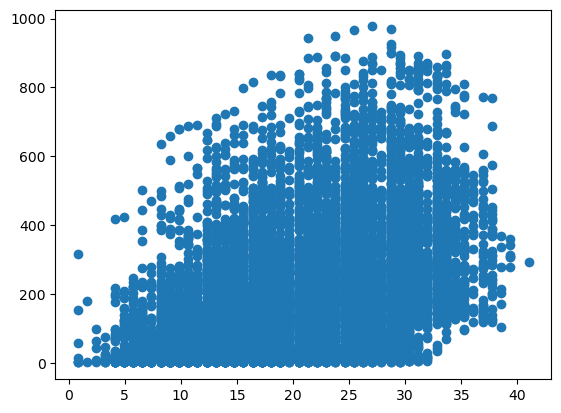

In [41]:
# temp대비 count
plt.scatter(x='temp', y='count', data=df)

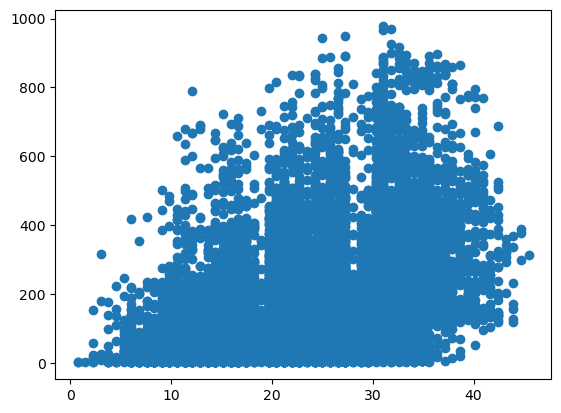

In [42]:
plt.scatter(x='atemp', y='count', data=df)

In [43]:
correlation = df['temp'].corr(df['atemp'])
print("temp와 atemp의 상관계수:", correlation)

temp와 atemp의 상관계수: 0.9849481104817072


In [44]:
df.drop(['atemp'], axis=1, inplace=True)
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129,2012,12,19,22


temp와 atemp의 상관계수 많이 높음. atemp 열 삭제

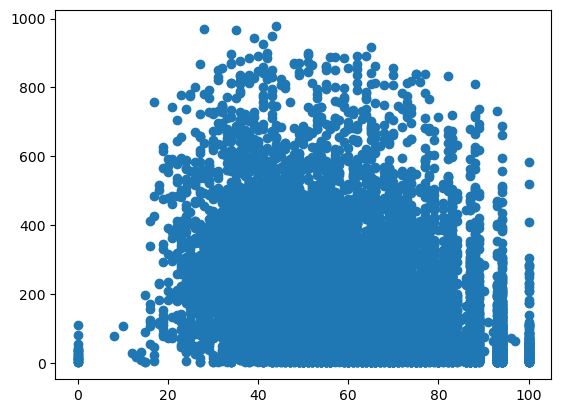

In [45]:
plt.scatter(x='humidity', y='count', data=df)

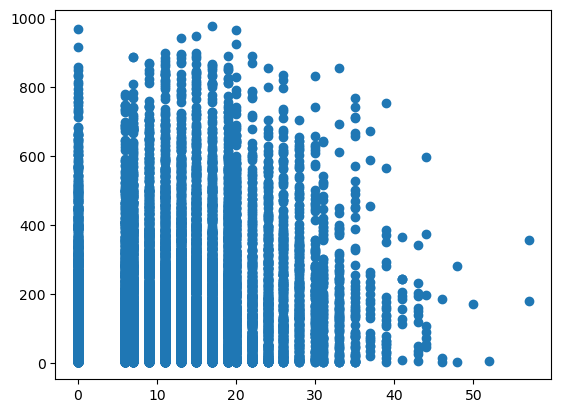

In [46]:
plt.scatter(x='windspeed', y='count', data=df)

In [47]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129,2012,12,19,22


In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler

In [49]:
# 4. feature, target 분리
X = df.drop(columns=['count', 'datetime', 'casual', 'registered'])
y = df['count']

In [50]:
# 5. RMSLE를 위한 log 변환
y_log = np.log1p(y)

# 6. 학습/검증 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 7. 모델 학습
rf_model = RandomForestRegressor(random_state=42)
lgbm_model = LGBMRegressor(random_state=42)

rf_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# 8. 예측 및 역변환
rf_preds = np.expm1(rf_model.predict(X_valid))
lgbm_preds = np.expm1(lgbm_model.predict(X_valid))

# 9. 실제값 역변환
y_valid_exp = np.expm1(y_valid)

# 10. RMSLE 평가
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rf_rmsle = rmsle(y_valid_exp, rf_preds)
lgbm_rmsle = rmsle(y_valid_exp, lgbm_preds)

print(f"Random Forest RMSLE: {rf_rmsle:.4f}")
print(f"LGBM RMSLE: {lgbm_rmsle:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 8708, number of used features: 11
[LightGBM] [Info] Start training from score 4.593780
Random Forest RMSLE: 0.3256
LGBM RMSLE: 0.3133


LGBM 이 RMSLE가 더 낮으므로 이걸로 모델 결정

test.csv 파일로 제출파일 생성

In [51]:
test = pd.read_csv("test.csv")
# datetime 형변환
test['datetime'] = pd.to_datetime(test['datetime'])

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

X_test = test.drop(columns=['datetime','atemp'])

In [52]:
test_preds = np.expm1(lgbm_model.predict(X_test))

# 5. submission 파일 생성
submission = pd.DataFrame({
    'datetime': test['datetime'],  # 원래 test에서 꺼내야 함
    'count': test_preds
})

# 6. 저장
submission.to_csv('submission.csv', index=False)
print("submission.csv 저장 완료!")

submission.csv 저장 완료!
